In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from controlgame import ControlGame

In [8]:
game = ControlGame(runtime=30)  # seconds

# Instructions

Run the cell below and click the "run" button. Then move the "MV" slider in a way which gets the controlled slider close to the setpoint. Your score increases more quickly when Controlled is near Setpoint. See how high your score can get by clicking run a couple of times. To see your performance graphed out, execute the next cell (`game.plot()`)

In [9]:
game.ui()

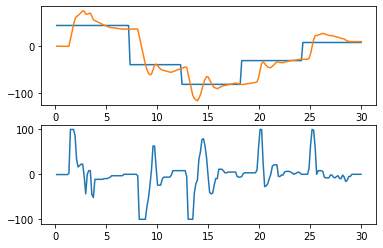

In [119]:
game.plot()

In [12]:
import scipy.signal

In [15]:
ts = game.ts

In [27]:
G = scipy.signal.lti(2, [2, 0])

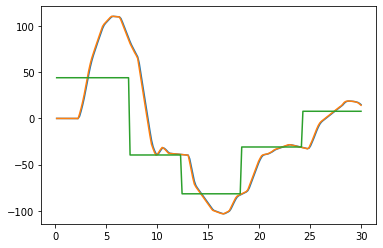

In [29]:
plt.plot(ts, calc_cv, ts, game.cvs, ts, game.sps)

In [30]:
import numpy

In [60]:
LIMIT = 100

In [61]:
def score(ts, sps, cvs):
    scores = 1 - numpy.minimum(numpy.abs(numpy.array(sps) - numpy.array(cvs)), LIMIT)/LIMIT
    
    score = sum(scores)
    
    return score
    

In [65]:
def sim(ts, mvs):
    _, cvs, _ = scipy.signal.lsim(G, mvs, ts)
    
    return cvs

In [66]:
def objective(mvs):
    return -score(game.ts, game.sps, sim(game.ts, mvs))

In [67]:
objective(game.mvs)

-148.67574585530264

In [69]:
import scipy.optimize

In [115]:
for i in range(10):
    sol = scipy.optimize.minimize(objective, bestmvs + 2*(numpy.random.rand(len(bestmvs))*2-1), bounds=[(-LIMIT, LIMIT)]*len(game.mvs))
    print('Score:', -sol.fun)
    bestmvs = sol.x
    bestmvs[numpy.abs(bestmvs)<10] = 0

Score: 195.8074018073565
Score: 195.85609898300487
Score: 195.88850197379423
Score: 195.88948376816955
Score: 195.9067491702799
Score: 195.92673939096449
Score: 195.9754111491555
Score: 196.00104269771523
Score: 195.97814500419923
Score: 196.0262922001685


In [116]:
bestcvs = sim(ts, bestmvs)

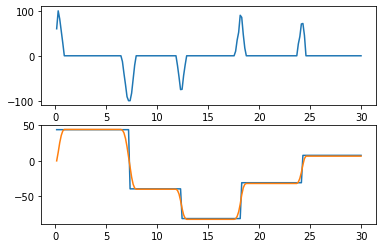

In [117]:
fig, (axmv, axcv) = plt.subplots(2, 1)
axmv.plot(ts, bestmvs)
axcv.plot(ts, game.sps, ts, bestcvs)